## UCU - Master of Science in Data Science and Analytics (MSDS) - DSC8307
### End of Semester Exam - (Project based exam type)
**MODULE:** Data Mining, Modelling and Analytics

**Year:** TWO **Semester:** ONE

**Student's Name:** Nantaba Ziria Phionah

**Registration Number:** J24M19/018 **Access Code:** B26281

**Facilitator:** Miss Kamusiime Immaculate

**PART A** [TOTAL: 30 MARKS]

*There are two datasets provided for this question. Bike_Sales.xlsx and Bike_Sales_Uganda.xlsx*

**1. Pre-process the dataset "Bike_Sales.xlsx" to exclude missing data and outliers. Save the
transformed dataset from above as your surname (e.g. Aine.xlsx) [10 MARKS]**

In [6]:
from google.colab import files

In [126]:
uploaded = files.upload()

Saving bike_Sales.xlsx to bike_Sales.xlsx


In [108]:
# 1. Data Loading and Initial Exploration (Bike_Sales.xlsx)

# Importing necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib # joblib and pickle for model saving
import pickle
from sklearn.model_selection import train_test_split # sklearn for machine learning
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
import re # and re for regular expressions

In [119]:
import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore")

In [127]:
# Loading the dataset "Bike_Sales.xlsx" file into a pandas DataFrame
bike_sales = pd.read_excel("bike_Sales.xlsx")

Data Exploration

In [128]:
# Getting an overview of the data
bike_sales.head(3)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2017-01-01,1,January,2017,17,Youth (<25),M,Canada,British Columbia,Bikes,Road Bikes,"Road-250 Red, 44",2,1519,2443,1848,3038,4886
1,2017-01-01,1,January,2017,23,Youth (<25),M,Australia,Victoria,Bikes,Mountain Bikes,"Mountain-200 Black, 46",2,1252,2295,2086,2504,4590
2,2017-01-01,1,January,2017,33,Young Adults (25-34),F,France,Yveline,Bikes,Road Bikes,"Road-150 Red, 48",2,2171,3578,2814,4342,7156


In [113]:
# Basic information about data/variable types
bike_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

In [114]:
# Descriptive statistics
bike_sales.describe()

,Date,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,2020-01-06 01:36:09.376127744,15.665753,2019.520153,35.919212,11.901660,267.296366,452.938427,372.681358,469.318695,842.000053
min,2017-01-01 00:00:00,1.000000,2017.000000,17.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000
25%,2019-01-09 00:00:00,8.000000,2019.000000,28.000000,2.000000,2.000000,5.000000,39.000000,28.000000,70.000000
50%,2019-10-16 00:00:00,16.000000,2019.500000,35.000000,10.000000,9.000000,24.000000,135.000000,108.000000,245.000000
75%,2021-01-28 00:00:00,23.000000,2021.000000,43.000000,20.000000,42.000000,70.000000,432.000000,432.000000,880.000000
max,2021-12-31 00:00:00,31.000000,2021.000000,87.000000,32.000000,2171.000000,3578.000000,26158.000000,42978.000000,69136.000000
std,NaN,8.781567,1.179704,11.021936,9.561857,549.835483,922.071219,595.080571,884.866118,1466.202934


Data Cleaning and Pre-processing

In [115]:
# Check for missing values in data set
bike_sales.isnull().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

In [116]:
# Converting currency columns i.e. Unit_Cost, Unit_Price, Cost, Profit, Revenue by removing '$' and ',' and converting them to float.

## Clean currency columns
def clean_currency(value):
    if isinstance(value, str):
        return float(value.replace('$', '').replace(',', ''))
    return float(value)

bike_sales['Unit_Cost'] = bike_sales['Unit_Cost'].apply(clean_currency)
bike_sales['Unit_Price'] = bike_sales['Unit_Price'].apply(clean_currency)
bike_sales['Profit'] = bike_sales['Profit'].apply(clean_currency)
bike_sales['Cost'] = bike_sales['Cost'].apply(clean_currency)
bike_sales['Revenue'] = bike_sales['Revenue'].apply(clean_currency)

In [129]:
bike_sales.head(3)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2017-01-01,1,January,2017,17,Youth (<25),M,Canada,British Columbia,Bikes,Road Bikes,"Road-250 Red, 44",2,1519,2443,1848,3038,4886
1,2017-01-01,1,January,2017,23,Youth (<25),M,Australia,Victoria,Bikes,Mountain Bikes,"Mountain-200 Black, 46",2,1252,2295,2086,2504,4590
2,2017-01-01,1,January,2017,33,Young Adults (25-34),F,France,Yveline,Bikes,Road Bikes,"Road-150 Red, 48",2,2171,3578,2814,4342,7156


In [130]:
# Removing space from Variable names i.e. Unit_Cost, Unit_Price, Cost and Revenue
bike_sales.columns = bike_sales.columns.str.replace(" ", "")
bike_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

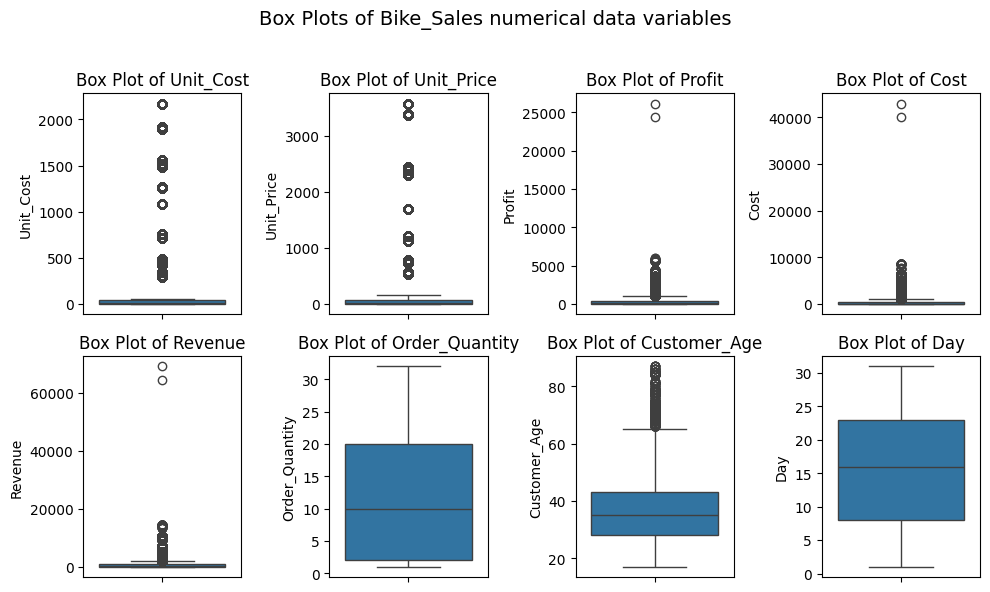

In [131]:
# Identifying outliers in the variables

# Numerical Data
n_data = bike_sales[["Unit_Cost", "Unit_Price", "Profit", "Cost", "Revenue", "Order_Quantity", "Customer_Age", "Day"]]

# Creating a figure with separate subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 6))  # 2x4 grid
fig.suptitle("Box Plots of Bike_Sales numerical data variables", fontsize=14)

# Flattening axes for easy iteration
axes = axes.flatten()

# Ploting each variable separately
for i, column in enumerate(n_data.columns):
    sns.boxplot(y=n_data[column], ax=axes[i])
    axes[i].set_title(f"Box Plot of {column}")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



**Observation:**
All numerical variable values have outliers apart from Order_Quantity and Day


In [132]:
# Handling outliers in the using the z-scores
from scipy import stats

# Computing z-scores
z_scores = np.abs(stats.zscore(n_data))

median_value = np.median(n_data)
n_data = np.where(z_scores > 3, median_value, n_data)
n_data

array([[1.519e+03, 2.443e+03, 1.848e+03, ..., 2.000e+00, 1.700e+01,
        1.000e+00],
       [1.252e+03, 2.295e+03, 2.086e+03, ..., 2.000e+00, 2.300e+01,
        1.000e+00],
       [2.900e+01, 2.900e+01, 2.900e+01, ..., 2.000e+00, 3.300e+01,
        1.000e+00],
       ...,
       [7.130e+02, 1.120e+03, 4.070e+02, ..., 1.000e+00, 2.600e+01,
        3.100e+01],
       [1.252e+03, 2.295e+03, 1.043e+03, ..., 1.000e+00, 3.300e+01,
        3.100e+01],
       [7.130e+02, 1.120e+03, 4.070e+02, ..., 1.000e+00, 4.400e+01,
        3.100e+01]])

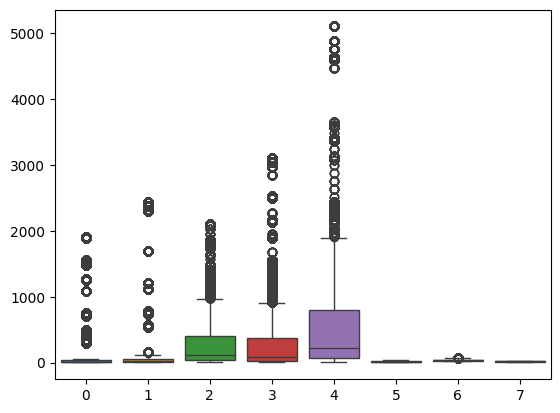

In [134]:
# Creating other boxplots to check for changes
sns.boxplot(data=n_data)

# Showing the plot
plt.show()

In [135]:
# Saving the cleaned dataset as xlsx
bike_sales.to_excel("Nantaba.xlsx", index=False)

**2. Generate a machine learning model to classify the variable "Age_Group" in the above
transformed dataset. Save the above generated model as a job lib or pickle called
"age_predictor.joblib" or "age_predictor.pkl"[10 MARKS]**

In [136]:
#Creating a copy of the dataframe for transforming variables through label encording
bike_sales_copy = bike_sales.copy()


In [137]:
# Converting categorical variables to numerical using Label Encoder for machine learning
label_encoder = LabelEncoder()
categorical_cols = ['Month', 'Age_Group', 'Customer_Gender', 'Country', 'State', 'Product_Category', 'Sub_Category', 'Product']
for col in categorical_cols:
    bike_sales_copy[col] = label_encoder.fit_transform(bike_sales_copy[col])

bike_sales_copy.head()  # Checking for the changes made by label encoder


,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2017-01-01,1,4,2017,17,3,1,1,5,1,11,66,2,1519,2443,1848,3038,4886
1,2017-01-01,1,4,2017,23,3,1,0,48,1,10,34,2,1252,2295,2086,2504,4590
2,2017-01-01,1,4,2017,33,2,0,2,52,1,11,58,2,2171,3578,2814,4342,7156
3,2017-01-01,1,4,2017,39,0,1,5,50,1,11,74,2,713,1120,814,1426,2240
4,2017-01-01,1,4,2017,42,0,1,5,6,1,11,91,2,344,540,392,688,1080


In [138]:
# Dropping the column date since its details are repeated and may not have an influence on determining the correlation matrix

col_dropped = bike_sales_copy.drop(columns=['Date'])
col_dropped.head(2)

,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,1,4,2017,17,3,1,1,5,1,11,66,2,1519,2443,1848,3038,4886
1,1,4,2017,23,3,1,0,48,1,10,34,2,1252,2295,2086,2504,4590


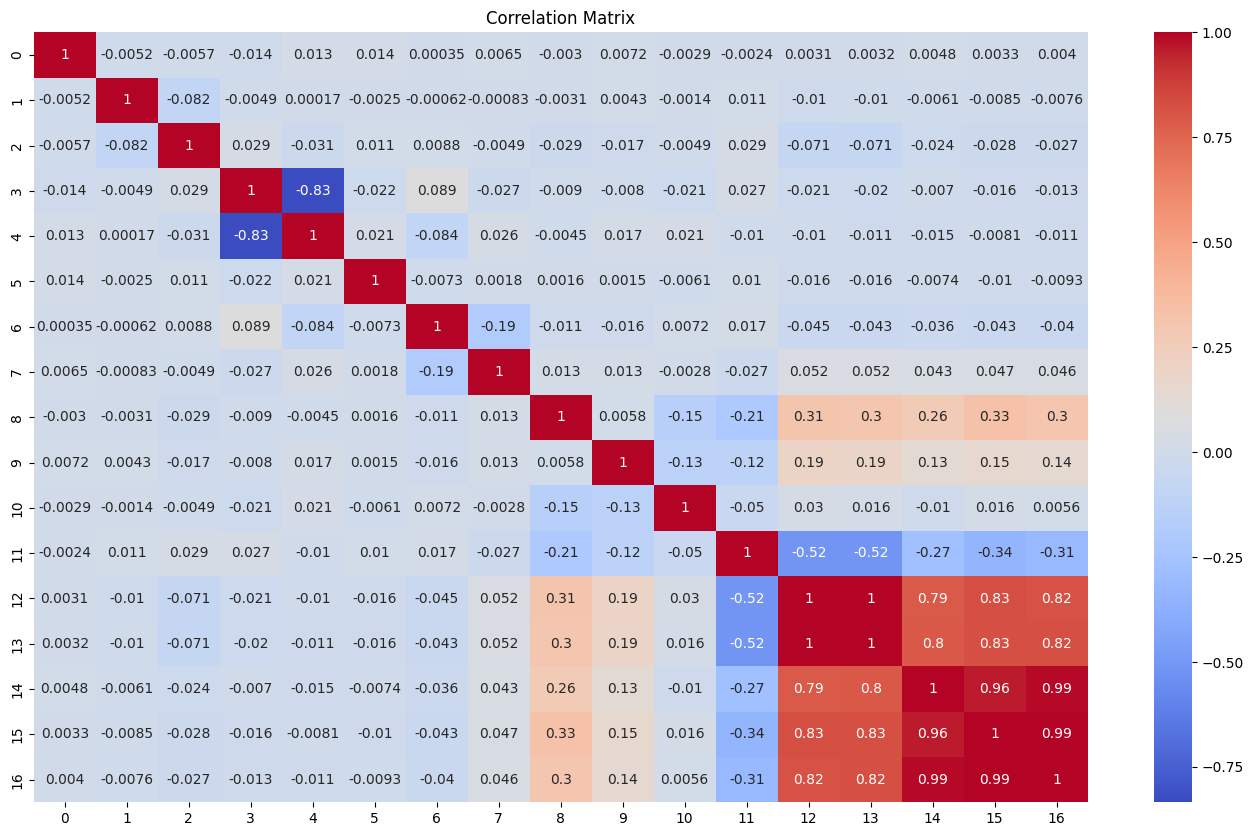

In [139]:
# Visualizing the correlation matrix using a heatmap to provide insights into the relationships between variables
plt.figure(figsize=(17, 10))
sns.heatmap(col_dropped.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Interpretation:** There is:

1.   A Strong negative relationship between Customer_age and Age_group, Order_Quantity and Unit_Cost, Order_Quantity and Unit_Price.
2.   A Strong positive relationship between Profit and revenue, Cost and Revenue, Cost and Profit,Revenue and Unit Cost, Revenue and Unit Price, Cost and Unit_Cost, and Ptrofit and Unit_Cost, and Revenue, Customer_Age and Profit, Age_Group and Cost.
3. A Weak negative relationship between Month and state, Country and Month, Month and Revenue.
4. And A weak positive correlation between Age_Group and Month, Day and Country.

In [140]:
# Preparing features and target variable by separating the features (X) and the target variable (y), 'Age_Group'
X = col_dropped.drop('Age_Group', axis=1)
y = col_dropped['Age_Group']

In [141]:
# Spliting the data into training and testing sets using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [142]:
# Training a Random Forest Classifier, a powerful ensemble method for classification
model_age = RandomForestClassifier(random_state=42) # setting the model results at 42
model_age.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [143]:
# Making predictions
y_pred = model_age.predict(X_test)

In [144]:
# Evaluating the model's accuracy using accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [145]:
#  Model Saving (Age_Group Classification)

# Saving the model as joblib
joblib.dump(model_age, "age_predictor.joblib")

print("Age_Group Classification model saved successfully as 'age_predictor.joblib'")

Age_Group Classification model saved successfully as 'age_predictor.joblib'


In [146]:
# Saving the model as pickle
with open("age_predictor.pkl", "wb") as f:  # Open the file in binary write mode
    pickle.dump(model_age, f)

print("Age_Group Classification model saved successfully as 'age_predictor.pkl'")

Age_Group Classification model saved successfully as 'age_predictor.pkl'


**3. Using the transformed dataset from question 1 as your training dataset, and the
"Bike_sales_Uganda.xlsx" as your testing data;**

a) **Generate a machine learning model to predict the "Revenue". Save the above model as a joblib or pickle called "Revenue_predictor" [10 MARKS]**

In [149]:
uploaded = files.upload()

Saving Bike_sales_Uganda.xlsx to Bike_sales_Uganda.xlsx


In [150]:
# Load the Bike_sales_Uganda dataset
bike_sales_uganda = pd.read_excel("Bike_sales_Uganda.xlsx")

In [151]:
bike_sales_uganda.isnull().sum()

Date                 0
Day                  0
Month                0
Year                 0
Customer_Age         0
Age_Group            0
Customer_Gender      0
Country              0
State                0
Product_Category     0
Sub_Category         0
Product              0
Order_Quantity       0
Unit_Cost            0
Unit_Price           0
Profit               0
Cost                 0
Revenue             23
dtype: int64

In [152]:
# Remove the 'Date' column from bike_sales_uganda
bike_sales_uganda = bike_sales_uganda.drop(columns=['Date'], errors='ignore')

In [154]:
# Preprocess the "Bike_sales_Uganda" dataset, cleaning currency columns
bike_sales_uganda['Unit_Cost'] = bike_sales_uganda['Unit_Cost'].apply(clean_currency)
bike_sales_uganda['Unit_Price'] = bike_sales_uganda['Unit_Price'].apply(clean_currency)
bike_sales_uganda['Profit'] = bike_sales_uganda['Profit'].apply(clean_currency)
bike_sales_uganda['Cost'] = bike_sales_uganda['Cost'].apply(clean_currency)
bike_sales_uganda['Revenue'] = bike_sales_uganda['Revenue'].apply(clean_currency)

bike_sales_uganda.head(3)

,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,1,June,2020,33,Young Adults (25-34),F,Uganda,Western,Accessories,Tires and Tubes,Patch Kit/8 Patches,100,1.0,2.0,30.0,30.0,NaN
1,1,July,2020,41,Adults (35-64),M,Uganda,Eastern,Accessories,Bottles and Cages,Road Bottle Cage,28,3.0,9.0,168.0,84.0,NaN
2,1,August,2020,33,Young Adults (25-34),F,Uganda,Northern,Accessories,Tires and Tubes,Patch Kit/8 Patches,24,1.0,2.0,24.0,24.0,NaN


In [155]:
# Encoding categorical variables using Label encoder (Uganda dataset)
for col in categorical_cols:
    if col in bike_sales_uganda.columns:
        bike_sales_uganda[col] = label_encoder.fit_transform(bike_sales_uganda[col])

print(bike_sales_uganda.head())

   Day  Month  Year  Customer_Age  Age_Group  Customer_Gender  Country  State  \
0    1      6  2020            33          1                0        0      7   
1    1      5  2020            41          0                1        0      1   
2    1      1  2020            33          1                0        0      4   
3    1     11  2020            37          0                1        0      5   
4    1     10  2020            30          1                0        0      6   

   Product_Category  Sub_Category  Product  Order_Quantity  Unit_Cost  \
0                 0             4        5             100        1.0   
1                 0             0        6              28        3.0   
2                 0             4        5              24        1.0   
3                 0             4        1              24        6.0   
4                 0             4        7              22        1.0   

   Unit_Price  Profit   Cost  Revenue  
0         2.0    30.0   30.0      

In [156]:
# Preparing training and testing data for revenue prediction
X_train_revenue = col_dropped.drop('Revenue', axis=1)
y_train_revenue = col_dropped['Revenue']
X_test_revenue = bike_sales_uganda.drop('Revenue', axis=1)
y_test_revenue = bike_sales_uganda['Revenue']

In [157]:
# Detecting NaN rows from X_test_revenue and y_test_revenue
nan_rows = y_test_revenue.isna()
nan_rows

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
20    True
21    True
22    True
Name: Revenue, dtype: bool

In [158]:
# Checking if y_test_revenue is entirely NaN
if nan_rows.all():
    print("Error: All revenue values in the Uganda dataset are NaN.")
    # Handle the error (e.g., skip prediction, return a default value)
else:
    # Filtering out NaN rows
    X_test_revenue = X_test_revenue[~nan_rows]
    y_test_revenue = y_test_revenue[~nan_rows]

Error: All revenue values in the Uganda dataset are NaN.


In [159]:
# Checking if X_test_revenue is now empty
if X_test_revenue.empty:
    print("Error: After removing NaN rows, the test dataset is empty.")
    # Handle the error (e.g., skip prediction)
else:
    # Train a Random Forest Regressor, suitable for predicting continuous values like revenue
    model_revenue = RandomForestRegressor(random_state=42)
    model_revenue.fit(X_train_revenue, y_train_revenue)


In [160]:
 # Making predictions
y_pred_revenue = model_revenue.predict(X_test_revenue)


In [82]:
# Evaluating the model using Mean Squared Error (MSE).
#mse = mean_squared_error(y_test_revenue, y_pred_revenue)
#print(f"Mean Squared Error: {mse}")

In [161]:
# Saving the trained model as joblib
joblib.dump(model_revenue, "Revenue_predictor.joblib")

['Revenue_predictor.joblib']

In [162]:
#Also saving as a pickle
with open("Revenue_predictor.pkl", "wb") as file:
    pickle.dump(model_revenue, file)

**b) Use the "Revenue_predictor" model to predict the "Revenue" in the testing dataset
"Bike_sales_Uganda.xlsx". Save your output prediction as a csv file labelled
"Revenue_prediction.csv" [10 MARKS]**

In [163]:
# Saving predictions to a CSV file
revenue_predictions = pd.DataFrame({'Predicted_Revenue': y_pred_revenue})
revenue_predictions.to_csv("Revenue_prediction.csv", index=False)

**PART B: [TOTAL: 40 MARKS]**

**DATASET 1**

*The Train.csv and Test.csv datasets provided are a collection of Abalone traits used to age various species using the target variable 'Rings'. There are two datasets provided, one of which is the training data and the other the testing data*

Use the datasets to answer the following questions;

**1. Generate a machine learning model suitable for predicting the age of Abalone. [10 MARKS]**

In [164]:
# Data Loading and Initial Exploration
uploaded = files.upload()

Saving Test.csv to Test.csv
Saving Train.csv to Train.csv


In [165]:
# Loading the datasets into pandas DataFrames
train_data = pd.read_csv("Train.csv")
test_data = pd.read_csv("Test.csv")

In [166]:
# Displaying the first few rows and basic information to get an initial understanding of the data
print("Train Data:")
train_data.head()


Train Data:


,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [167]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              90615 non-null  int64  
 1   Sex             90615 non-null  object 
 2   Length          90615 non-null  float64
 3   Diameter        90615 non-null  float64
 4   Height          90615 non-null  float64
 5   Whole weight    90615 non-null  float64
 6   Whole weight.1  90615 non-null  float64
 7   Whole weight.2  90615 non-null  float64
 8   Shell weight    90615 non-null  float64
 9   Rings           90615 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 6.9+ MB


In [168]:
#Descriptive statistics for the train data
train_data.describe()

,id,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
count,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000
mean,45307.000000,0.517098,0.401679,0.135464,0.789035,0.340778,0.169422,0.225898,9.696794
std,26158.441658,0.118217,0.098026,0.038008,0.457671,0.204428,0.100909,0.130203,3.176221
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,22653.500000,0.445000,0.345000,0.110000,0.419000,0.177500,0.086500,0.120000,8.000000
50%,45307.000000,0.545000,0.425000,0.140000,0.799500,0.330000,0.166000,0.225000,9.000000
75%,67960.500000,0.600000,0.470000,0.160000,1.067500,0.463000,0.232500,0.305000,11.000000
max,90614.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [169]:
print("\nMissing values in Train Data:")
train_data.isna().sum()


Missing values in Train Data:


id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
Rings             0
dtype: int64

In [170]:
print("\nTest Data:")
test_data.head()


Test Data:


,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,90615,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,90616,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,90617,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,90618,M,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,90619,I,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050


In [171]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60411 entries, 0 to 60410
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              60411 non-null  int64  
 1   Sex             60411 non-null  object 
 2   Length          60411 non-null  float64
 3   Diameter        60411 non-null  float64
 4   Height          60411 non-null  float64
 5   Whole weight    60411 non-null  float64
 6   Whole weight.1  60411 non-null  float64
 7   Whole weight.2  60411 non-null  float64
 8   Shell weight    60411 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.1+ MB


In [172]:
test_data.describe()

,id,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
count,60411.000000,60411.000000,60411.000000,60411.000000,60411.000000,60411.000000,60411.000000,60411.000000
mean,120820.000000,0.517428,0.401961,0.135751,0.790062,0.341227,0.169419,0.226125
std,17439.297893,0.117609,0.097470,0.038175,0.457591,0.204221,0.100720,0.129826
min,90615.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500
25%,105717.500000,0.450000,0.345000,0.110000,0.419500,0.178500,0.086500,0.120000
50%,120820.000000,0.545000,0.425000,0.140000,0.801500,0.329000,0.166000,0.225000
75%,135922.500000,0.600000,0.470000,0.160000,1.070000,0.464500,0.232500,0.305000
max,151025.000000,0.800000,0.650000,1.095000,2.825500,1.488000,0.641500,1.004000


In [173]:
# Check for missing values in test data
print("\nMissing values in Test Data:")
test_data.isnull().sum()


Missing values in Test Data:


id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
dtype: int64

In [174]:
# Handling categorical variable 'Sex'

# Let's use LabelEncoder to convert the categorical 'Sex' variable into numerical values in both datasets.
# And Use fit_transform on the training data and transform on the test data to ensure consistency.

label_encoder = LabelEncoder()
train_data['Sex'] = label_encoder.fit_transform(train_data['Sex'])
test_data['Sex'] = label_encoder.transform(test_data['Sex'])

train_data.head(4)



,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.240,11
1,1,0,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.320,11
2,2,1,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.005,6
3,3,2,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.250,10


In [175]:
#Checking for changes
test_data.head(3)

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,90615,2,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,90616,2,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,90617,2,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405


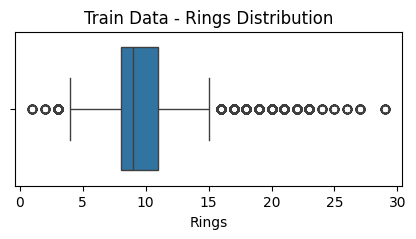

In [176]:
#Checking for outliers in 'Rings'
plt.figure(figsize=(5, 2))
sns.boxplot(x=train_data['Rings'])
plt.title('Train Data - Rings Distribution')
plt.show()

**Observation:** There are observed outliers in the Rings column

In [177]:
# Handling Outliers (Example: using IQR method for 'Rings' in Train data)
Q1 = train_data['Rings'].quantile(0.25)
Q3 = train_data['Rings'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
train_data = train_data[(train_data['Rings'] >= lower_bound) & (train_data['Rings'] <= upper_bound)]

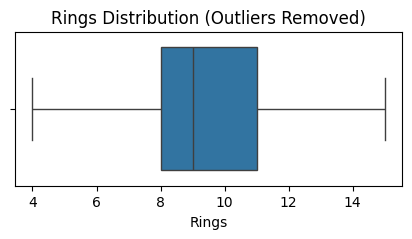

In [178]:
# Visualizing Rings distribution after outlier removal using a Boxplot.
plt.figure(figsize=(5, 2))
sns.boxplot(x=train_data['Rings'])
plt.title('Rings Distribution (Outliers Removed)')
plt.show()

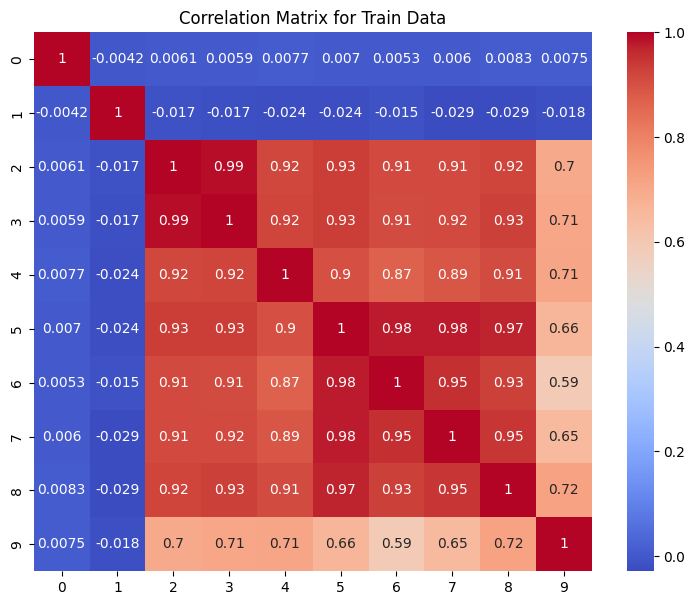

In [179]:
# Visualizing correlation matrix for train data using a heatmap
plt.figure(figsize=(9, 7))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Train Data')
plt.show()

**Observation:**
1. There is a strong positive correlation between length and diameter, Whole weight and Whole weight 1, Whole weight and Whole weight 2, Whole weight and Shell weight, Whole weight 2 and Whole weight 1

2. A strong negative correlation between Shell weight and Whole weight, Sex and Whole weight 2



In [180]:
# Machine Learning Model Training (Train Data)

# Prepare features (X_train) and target variable (y_train)
X_train = train_data.drop(['id', 'Rings'], axis=1)
y_train = train_data['Rings']

In [181]:
# Training a Random Forest Regressor
model_train = RandomForestRegressor(random_state=42)
model_train.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [182]:
# Making predictions on the training data and evaluating the model using MSE
y_train_pred = model_train.predict(X_train)

In [183]:
# Evaluating the model on the training data
mse_train = mean_squared_error(y_train, y_train_pred)
print(f"Training Mean Squared Error: {mse_train}")

Training Mean Squared Error: 0.2571095818117564


**Interpretation:**

Considering that our target variable has a relative range of 1-29 units, a relative error of 0.2571095818117564 symbolizes that our model is good.
Thus giving a good prediction of Abalone's age

In [184]:
#Model Saving (Train Data)

# Saving the trained model as joblib
joblib.dump(model_train, "train_abalone_age.joblib")

['train_abalone_age.joblib']

In [185]:
# Saving the model as pickle
with open("train_abalone_age.pkl", "wb") as f:  # Open the file in binary write mode
    pickle.dump(model_train, f)

**2. To predict the age of the Abalone species in the testing dataset (i.e. Test.csv) [5 MARKS]**

In [186]:
#Prediction on Test Data

# Preparing the features (X_test) for the test data
X_test = test_data.drop('id', axis=1)

In [187]:
# Let's use the trained model to make predictions on the test data
y_test_pred = model_train.predict(X_test)

In [188]:
test_predictions = pd.DataFrame({'id': test_data['id'], 'Predicted_Rings': y_test_pred})

In [189]:
# Converting the 'predictions' column to integers
test_predictions['Predicted_Rings'].astype(int)

0        10
1         9
2         9
3        10
4         7
         ..
60406     6
60407     9
60408    11
60409    12
60410     9
Name: Predicted_Rings, Length: 60411, dtype: int64

In [190]:
# Saving the predictions to a CSV file named "test_predictions.csv"
test_predictions.to_csv("Test_predictions.csv", index=False)

**DATASET 2**

*The PatientReviews.csv dataset contains the patients’ medical visits with timelogs at a public
healthcare centre.*
Use the dataset to answer the following questions;

**3. Generate the event logs for the above dataset and save them as Question 2. [10 MARKS]**

In [8]:
uploaded = files.upload()

Saving PatientReviews.csv to PatientReviews.csv


In [9]:
# Load the dataset
patient_reviews = pd.read_csv("PatientReviews.csv")

In [10]:
# Display the first few rows
patient_reviews.head()

,patient,action,org:resource,DateTime
0,patient 0,First consult,Dr. Anna,2017-01-02 11:40:11
1,patient 0,Blood test,Lab,2017-01-02 12:47:33
2,patient 0,Physical test,Nurse Jesse,2017-01-02 12:53:50
3,patient 0,Second consult,Dr. Anna,2017-01-02 16:21:06
4,patient 0,Surgery,Dr. Charlie,2017-01-05 13:23:09


In [11]:
patient_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   patient        690 non-null    object
 1    action        690 non-null    object
 2    org:resource  690 non-null    object
 3    DateTime      690 non-null    object
dtypes: object(4)
memory usage: 21.7+ KB


In [12]:
patient_reviews.isnull().sum()

,0
patient,0
action,0
org:resource,0
DateTime,0


In [13]:
# Obtaining descriptive statistics
patient_reviews.describe()

,patient,action,org:resource,DateTime
count,690,690,690,690
unique,100,8,13,690
top,patient 50,First consult,Dr. Anna,2017-01-02 11:40:11
freq,7,100,158,1


In [14]:
import logging

In [17]:
!pip3 install pm4py

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.1 MB/s eta 0:00:00
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26097 sha256=460d32c39c212e101147f41b0116c4bab1040abed92d487fe3380b37c6ecce8e
  Stored in directory: /root/.cache/pip/wheels/31/d7/d9/eec6891f78cac19a693bd40ecb8365d2f4613318c145ec9816
Successfully built intervaltree


In [18]:
!pip show pm4py

Name: pm4py
Version: 2.7.13.1
Summary: Process mining for Python
Home-page: https://processintelligence.solutions/
Author: Process Intelligence Solutions (PIS)
Author-email: info@processintelligence.solutions
License: AGPL 3.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: cvxopt, deprecation, graphviz, intervaltree, lxml, matplotlib, networkx, numpy, pandas, pydotplus, pytz, scipy, setuptools, tqdm, wheel
Required-by: 


In [19]:
# Import Npm4py as a process mining library used to analyze event logs and extract process models
import pm4py
print(pm4py.__version__)

/usr/local/lib/python3.11/dist-packages/cudf/utils/_ptxcompiler.py:64: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 4, in <module>
  File "/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/cudadrv/driver.py", line 314, in __getattr__
    raise CudaSupportError("Error at driver init: \n%s:" %
numba.cuda.cudadrv.error.CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:


Not patching Numba
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Failed to dlopen libcuda.so.1
  warnings.warn(str(e))


2.7.13.1


In [20]:
# Checking the variable datatypes
patient_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   patient        690 non-null    object
 1    action        690 non-null    object
 2    org:resource  690 non-null    object
 3    DateTime      690 non-null    object
dtypes: object(4)
memory usage: 21.7+ KB


In [21]:
# Convert the ' DateTime' column to datetime
patient_reviews[' DateTime'] = pd.to_datetime(patient_reviews[' DateTime'])

# Converting the DataFrame to an event log format
event_log = pm4py.format_dataframe(patient_reviews, case_id='patient', activity_key=' action', timestamp_key=' DateTime')

# Saving the event log in XES format, a standard format for process mining
#pm4py.write_xes(event_log, "patient_reviews.xes")

exporting log, completed traces ::   0%|          | 0/100 [00:00<?, ?it/s]

In [22]:
# Saving the event log in XES format, a standard format for process mining
pm4py.write_xes(event_log, 'Question 2.xes')

exporting log, completed traces ::   0%|          | 0/100 [00:00<?, ?it/s]

In [23]:
# Configuring event logs
logging.basicConfig(
    filename="event_logs.log",  # Log file name
    level=logging.INFO,         # Log level (INFO, DEBUG, WARNING, ERROR, CRITICAL)
    format="%(asctime)s - %(levelname)s - %(message)s",  # Log format
)

# Generate logs
logging.info("This is an info message.")
logging.warning("This is a warning!")
logging.error("Something went wrong.")

ERROR:root:Something went wrong.


In [24]:
# Configure logging to save to a file
logging.basicConfig(
    filename="app_logs.log",  # Log file name
    level=logging.INFO,        # Log level
    format="%(asctime)s - %(levelname)s - %(message)s",  # Log format
)

# Logging messages
logging.info("Application started.")
logging.warning("This is a warning!")
logging.error("An error occurred.")

print("Logs saved to app_logs.log")

ERROR:root:An error occurred.


Logs saved to app_logs.log


**4. Generate a visual showing “actions” undertaken at the hospital between January 2017
and June 2017. [10 MARKS]**

In [26]:
# Filtering data to include only between January 2017 and June 2017
filtered_data = patient_reviews[(patient_reviews[' DateTime'] >= '2017-01-01') & (patient_reviews[' DateTime'] <= '2017-06-30')]

<ipython-input-34-dec9dda2daef>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=' action', data=filtered_data, order=filtered_data[' action'].value_counts().index, palette="Blues_r")  # Creating the count plot with shades of blue and Reversing 'Blues' from dark to light effect


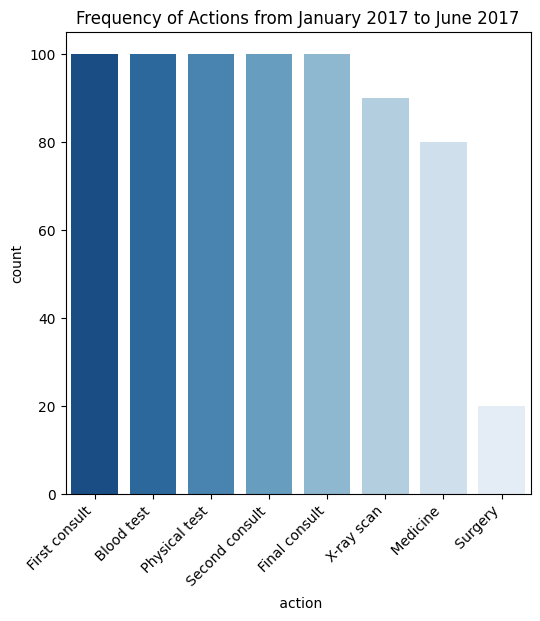

In [34]:
# Visualizing actions undertaken by the hospital between Jan and June 2017 using a countplot
plt.figure(figsize=(6, 6)) # Seting figure size
sns.countplot(x=' action', data=filtered_data, order=filtered_data[' action'].value_counts().index, palette="Blues_r")  # Creating the count plot with shades of blue and Reversing 'Blues' from dark to light effect
plt.title('Frequency of Actions from January 2017 to June 2017') # Customizing plot
plt.xticks(rotation=45, ha='right')
plt.show() # Show plot

**Observation:** First consult, Blood test, Physical test, Second consult, and Final consult had the highest actions undertaken at the hospital while, surgery had the lowest.

**5. Using appropriate process mining algorithms, show the flow of “actions” undertaken at
the hospital. [10 MARKS]**

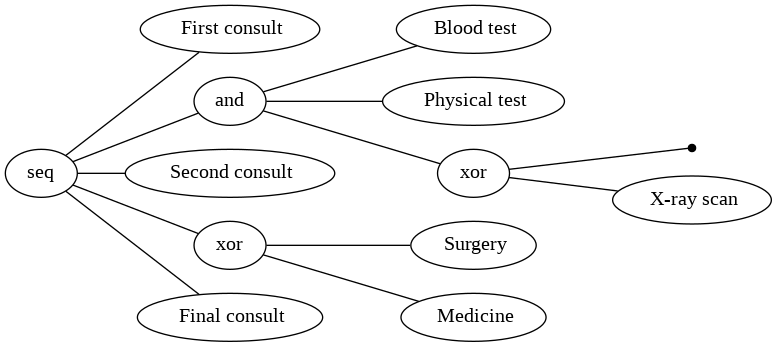

In [35]:
# Process Flow Analysis

# Using the Inductive Miner algorithm (pm4py.discover_process_tree_inductive) to discover a process tree model from the event log
process_tree = pm4py.discover_process_tree_inductive(event_log)
pm4py.view_process_tree(process_tree)

**Interpretation:** The overall structure indicates that the initial steps undertaken at the hospital are First consult, Second consult and Final consult.
* Based on the process tree, there are three actions undertaken exclusively i.e., Surgery, Medicine and X-ray.

* And there are two activities which can be undertaken concurrently i.e., Blood
test and Physical test.



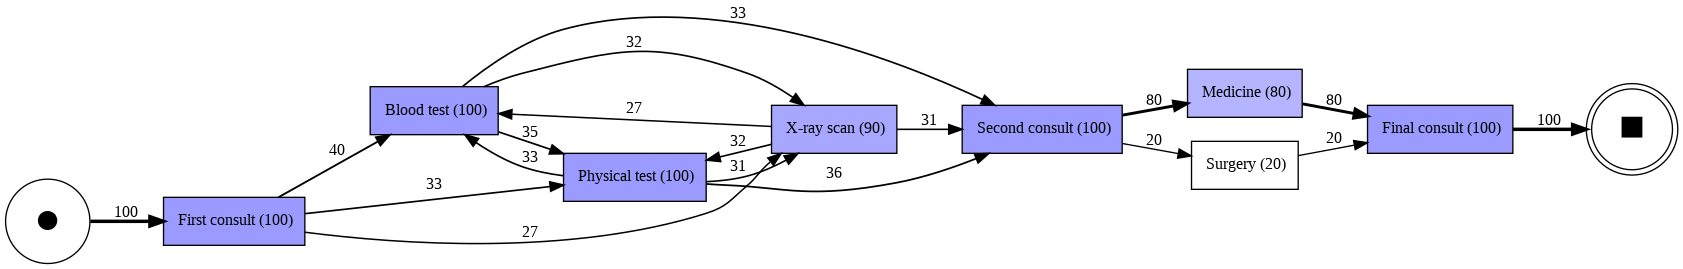

In [36]:
# Visualizing the Directly-Follows Graph (DFG), which shows the direct relationships between activities.
dfg, start_activities, end_activities = pm4py.discover_dfg(event_log)
pm4py.view_dfg(dfg, start_activities, end_activities)

**Interpretation:** Based on the event log,
* The visual representation above indicates that First consult is the first/initial action conducted at the hospital followed by either Blood test, Physical test or X-ray.

* And the last actions undertaken are Medicine and surgery prior to the final action i.e., Final consult.

**PART C [TOTAL: 30 MARKS]**

*(Dataset Source: https://wheeloffortuneanswer.com/) This dataset contains information about
various puzzle categories like "Around the House", "Before and After", "Book Title", and many
more.*

**1. Generate a python script that you can use to scrap the provided website to access the data.
Save your data as ‘Your_Last_name.csv’ file (e.g. Aine.csv). [5 MARKS]**

In [37]:
# importing libraries
import requests  # requests for making HTTP requests
from bs4 import BeautifulSoup  # BeautifulSoup for parsing HTML
import nltk  # nltk for NLP
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from wordcloud import WordCloud

In [38]:
# Downloading NLTK resources
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [39]:
# URL of the Wheel of Fortune answer website
url = "https://wheeloffortuneanswer.com/"

# Sending a GET request to the provided URL and parse the HTML content
response = requests.get(url)

# Parsing the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, "html.parser")

In [40]:
# Locating the puzzle categories and answers within the HTML structure
puzzle_categories = []
puzzle_answers = []

In [41]:
# Assuming the puzzles are within divs with a specific class and adjusting the class as required.
puzzle_divs = soup.find_all("div", class_="entry-content") #Adjust class if needed.

for div in puzzle_divs:
    puzzles = div.find_all("p")
    for puzzle in puzzles:
        text = puzzle.text.strip()
        if ":" in text:
            category, answer = text.split(":", 1)
            puzzle_categories.append(category.strip())
            puzzle_answers.append(answer.strip())


In [42]:
# Creating a pandas DataFrame
puzzle_data = pd.DataFrame({"Category": puzzle_categories, "Word To Guess": puzzle_answers})

# Save the data to a CSV file
puzzle_data.to_csv("Nantaba.csv", index=False)

In [43]:
import os
print(os.getcwd())

/content


In [53]:
# Displaying the first few rows of the DataFrame
puzzle_data.head()

,Category,Word To Guess
0,Update,Thank you everyone for your valuable feedbacks...


In [54]:
puzzle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Category       1 non-null      object
 1   Word To Guess  1 non-null      object
dtypes: object(2)
memory usage: 148.0+ bytes


**2 Generate a visual to depict the “Word To Guess” variable in the above dataset [5 MARKS]**

In [46]:
# Loading the puzzle data
puzzle_data = pd.read_csv("Nantaba.csv")

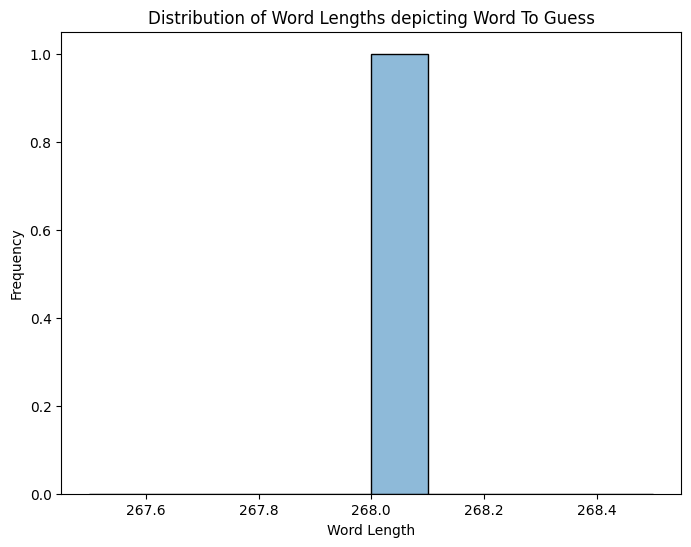

In [66]:
# Visualizing the length of "Word To Guess"
puzzle_data["Word Length"] = puzzle_data["Word To Guess"].apply(len)
plt.figure(figsize=(8, 6))
sns.histplot(puzzle_data["Word Length"], bins=10, kde=True)
plt.title("Distribution of Word Lengths depicting Word To Guess")
plt.xlabel("Word Length")
plt.ylabel("Frequency")
plt.show()

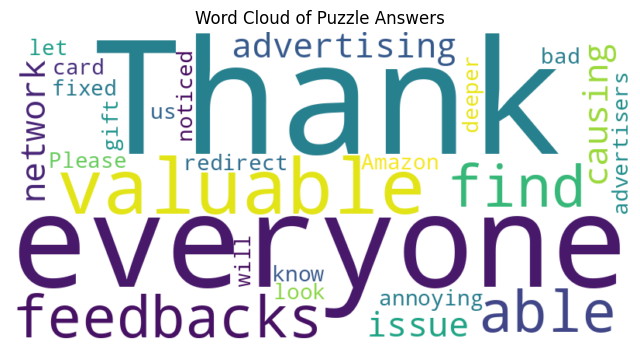

In [68]:
# Generating a word cloud of the puzzle answers
text = " ".join(puzzle_data["Word To Guess"].tolist())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Puzzle Answers")
plt.show()

**DATASET 2**

*The European news.csv dataset provided contains news articles published by a European news
agency over several years. The news articles are classified under particular ‘labels’ to help
identify them.*

**3. Generate visual(s) that would best present the news article to a wide audience. [10 MARKS]**

In [69]:
uploaded = files.upload()

Saving European news.csv to European news.csv


In [70]:
# Loading the European news data
news_data = pd.read_csv("European news.csv")

In [71]:
# Checking for missing values
news_data.isnull().sum()


,0
Articles,0
labels,0


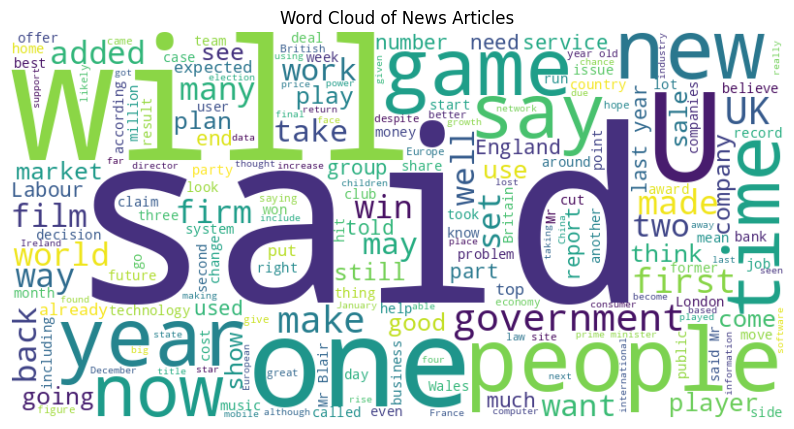

In [80]:
# Generating a word cloud of the news article
text = " ".join(news_data["Articles"].tolist())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of News Articles")
plt.show()

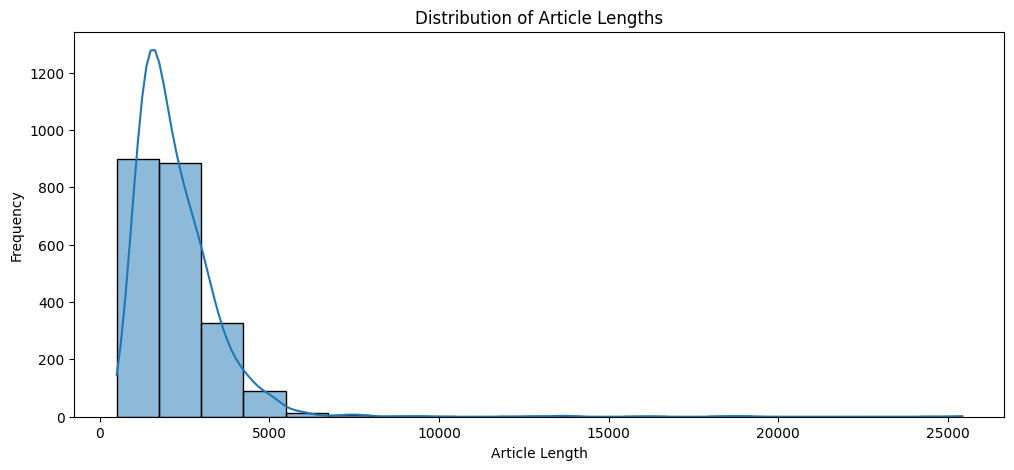

In [81]:
# Visualizing the length of news articles
news_data["Article Length"] = news_data["Articles"].apply(len)
plt.figure(figsize=(12, 5))
sns.histplot(news_data["Article Length"], bins=20, kde=True)
plt.title("Distribution of Article Lengths")
plt.xlabel("Article Length")
plt.ylabel("Frequency")
plt.show()

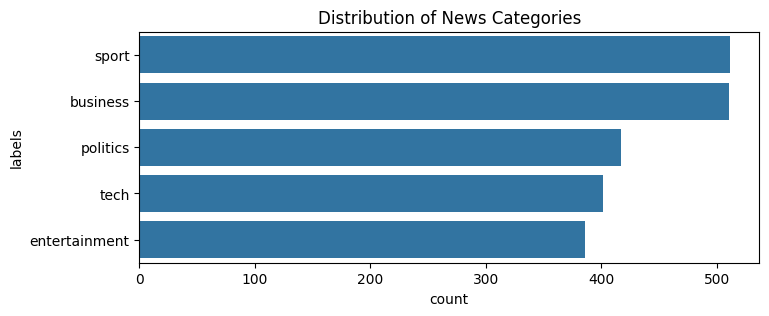

In [75]:
# Visualizing the distribution of labels
plt.figure(figsize=(8, 3))
sns.countplot(y="labels", data=news_data, order=news_data["labels"].value_counts().index)
plt.title("Distribution of News Categories")
plt.show()

**4. Generate a natural language processing algorithm that would best classify the news
articles. [10 MARKS]**

In [84]:
# Text preprocessing
stop_words = set(stopwords.words("english"))

In [88]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [92]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet') #download wordnet for lemmatizer.
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    filtered_tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalnum() and token not in stop_words]
    return " ".join(filtered_tokens)

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [95]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [96]:
# Creating a new column 'Processed_Articles' with preprocess text
news_data['Processed_Articles'] = news_data['Articles'].apply(preprocess_text)

In [98]:
# Checking for changes
news_data.head()

,Articles,labels,Article Length,Processed_Articles
0,Musicians to tackle US red tape Musicians gro...,entertainment,2254,musician tackle u red tape musician group tack...
1,"U2s desire to be number one U2, who have won ...",entertainment,4799,u2s desire number one u2 three prestigious gra...
2,Rocker Doherty in on-stage fight Rock singer ...,entertainment,2125,rocker doherty fight rock singer pete doherty ...
3,Snicket tops US box office chart The film ada...,entertainment,1052,snicket top u box office chart film adaptation...
4,"Oceans Twelve raids box office Oceans Twelve,...",entertainment,1598,ocean twelve raid box office ocean twelve crim...


In [100]:
# Feature extraction using TF-IDF from the preprocessed text
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(news_data["Processed_Articles"])
y = news_data["labels"]

In [101]:
# Spliting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
# NLP Models
models = {
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

In [103]:
# Training and evaluate models
# Printing the classification report for each model, showing precision, recall, F1-score, and support

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))

Model: Naive Bayes
               precision    recall  f1-score   support

     business       0.97      0.98      0.98       103
entertainment       1.00      0.96      0.98        84
     politics       0.92      0.99      0.95        80
        sport       0.99      0.99      0.99        98
         tech       0.99      0.94      0.96        80

     accuracy                           0.97       445
    macro avg       0.97      0.97      0.97       445
 weighted avg       0.97      0.97      0.97       445

Model: Random Forest
               precision    recall  f1-score   support

     business       0.94      0.95      0.95       103
entertainment       1.00      0.99      0.99        84
     politics       0.97      0.97      0.97        80
        sport       0.99      0.98      0.98        98
         tech       0.95      0.96      0.96        80

     accuracy                           0.97       445
    macro avg       0.97      0.97      0.97       445
 weighted avg       